In [255]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option("display.max_columns", None)

In [233]:
data = pd.read_csv("AI_impact_survey_data1.csv")

In [234]:
question_cols = ['Q1', 'Q1_17_TEXT', 'Q2','Q2_6_TEXT', 'Q3', 'Q4', 'Q5_1', 'Q5_2', 'Q5_3', 'Q5_4', 'Q7','Q7_10_TEXT', 'Q8_1', 'Q19_1', 'Q11_1', 'Q12', 'Q12.1']
questions = data[question_cols].iloc[0]
question_answer = data[question_cols].iloc[2:,:]

In [235]:
question_answer = question_answer.rename({"Q1":"Major"},axis=1)

In [236]:
question_answer = question_answer.rename({"Q2":"Year"},axis=1)

In [237]:
question_answer = question_answer.rename({"Q3":"Uses AI"},axis=1)

question_answer["Uses AI"] = question_answer["Uses AI"].replace({"No":0,"Yes":1})

C:\Users\zcoch\AppData\Local\Temp\ipykernel_40956\2185742461.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  question_answer["Uses AI"] = question_answer["Uses AI"].replace({"No":0,"Yes":1})


In [238]:
question_answer = question_answer.join(
    question_answer["Q4"]
      .str.get_dummies(sep=",")
)

In [239]:
question_answer = question_answer.rename({"Q5_1":"ChatGPT Weekly Prompts","Q5_2":"Google Gemini Weekly Prompts","Q5_3":"Claude Weekly Prompts"},axis=1)
cols = [
    "ChatGPT Weekly Prompts",
    "Google Gemini Weekly Prompts",
    "Claude Weekly Prompts"
]

question_answer[cols] = question_answer[cols].apply(
    pd.to_numeric, errors="coerce"
)

In [240]:
question_answer["Q7"] = (
    question_answer["Q7"]
      .str.replace(r"\s*\([^)]*\)", "", regex=True) 
      .str.replace(":", "", regex=False)           
      .str.strip()
)
question_answer = question_answer.join(
    question_answer["Q7"]
      .str.get_dummies(sep=",")
)

In [241]:
question_answer = question_answer.rename({'Q8_1': 'How many times more energy do you think is required to generate AI text prompts compared to a Google search? - Times more energy',
 'Q19_1': 'How much water (in mL) do you think is required for cooling 1 prompt? - Amount of water in mL',
 'Q11_1': 'How much do you think AI contributes to carbon dioxide (CO₂) emissions? For example: Training an AI model. - Tons of CO₂',
 'Q12': 'How much do you think is a reasonable cost of training an AI Language Model?',
 'Q12.1': 'How much time do you think it takes to build an AI Language Model?'},axis=1)

In [242]:
final_cols = ['Major', 'Year', 'Uses AI','ChatGPT Weekly Prompts', 'Google Gemini Weekly Prompts','Claude Weekly Prompts',
       'How many times more energy do you think is required to generate AI text prompts compared to a Google search? - Times more energy',
       'How much water (in mL) do you think is required for cooling 1 prompt? - Amount of water in mL',
       'How much do you think AI contributes to carbon dioxide (CO₂) emissions? For example: Training an AI model. - Tons of CO₂',
       'How much do you think is a reasonable cost of training an AI Language Model?',
       'How much time do you think it takes to build an AI Language Model?',
       'ChatGPT', 'Claude (Anthropic)', 'Google Gemini',  #Model Uses
       'Coding','Conversational', 'Creativity', 'Others You may elaborate here.', ### Use cases
       'Planning / Scheduling', 'Problem-Solving / Arithmetic', 'Research',
       'Studying', 'Summarization / Paraphrasing', 'Writing']

question_answer[final_cols]

,Major,Year,Uses AI,ChatGPT Weekly Prompts,Google Gemini Weekly Prompts,Claude Weekly Prompts,How many times more energy do you think is required to generate AI text prompts compared to a Google search? - Times more energy,How much water (in mL) do you think is required for cooling 1 prompt? - Amount of water in mL,How much do you think AI contributes to carbon dioxide (CO₂) emissions? For example: Training an AI model. - Tons of CO₂,How much do you think is a reasonable cost of training an AI Language Model?,How much time do you think it takes to build an AI Language Model?,ChatGPT,Claude (Anthropic),Google Gemini,Coding,Conversational,Creativity,Others You may elaborate here.,Planning / Scheduling,Problem-Solving / Arithmetic,Research,Studying,Summarization / Paraphrasing,Writing
2,12,Senior,1.0,7.0,NaN,NaN,5,8,383,$1 Million - $10 Million,More than 24 months,1,0,0,0,1,1,0,0,1,1,1,1,1
3,Computer and information sciences,Senior,1.0,10.0,40.0,20.0,10,5,490,$1 Million - $10 Million,6-12 months,1,1,1,1,0,0,0,0,1,1,1,0,0
4,Biology/Chemistry/life sciences,Senior,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Data Science,Junior,1.0,250.0,250.0,250.0,10,10,1000,$10 Million - $100 Million,3-6 months,1,1,1,1,1,1,0,1,1,1,1,1,1
6,Other,Senior,1.0,10.0,NaN,NaN,10,10,1000,$1 Million - $10 Million,1-3 months,1,0,0,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Mathematics and Statistics,Junior,1.0,NaN,NaN,NaN,2,3,450,$1 Million - $10 Million,More than 24 months,1,0,0,1,0,0,0,0,1,1,1,0,0
81,Other,Sophmore,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,1,0,1,0,0
82,Other,Junior,1.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,1,0,0,0,1,0
83,Education,Senior,1.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,1,0,1,0,1


# Explore

In [243]:
question_answer["Major"].value_counts()

Major
Other                                   14
Biology/Chemistry/life sciences         13
Cognitive Science                        9
Data Science                             6
Psychology                               6
Engineering                              5
Mathematics and Statistics               5
Computer and information sciences        4
Business/Business Economics              3
12                                       1
English                                  1
Cognitive Science,Psychology             1
Mathematics and Statistics,Education     1
Education                                1
Name: count, dtype: int64

In [244]:
question_answer["Year"].value_counts()

Year
Junior             28
Senior             24
Sophmore           12
Freshman            5
Graduate School     1
Name: count, dtype: int64

In [245]:
question_answer["Uses AI"].value_counts()

Uses AI
1.0    55
0.0    15
Name: count, dtype: int64

In [246]:
question_answer["ChatGPT"].value_counts()

ChatGPT
1    47
0    36
Name: count, dtype: int64

In [247]:
question_answer["Google Gemini"].value_counts()

Google Gemini
0    59
1    24
Name: count, dtype: int64

In [248]:
question_answer["Claude (Anthropic)"].value_counts()

Claude (Anthropic)
0    73
1    10
Name: count, dtype: int64

In [249]:
question_answer["ChatGPT Weekly Prompts"]

2       7.0
3      10.0
4       NaN
5     250.0
6      10.0
      ...  
80      NaN
81      NaN
82      NaN
83     15.0
84      NaN
Name: ChatGPT Weekly Prompts, Length: 83, dtype: float64

array([[<Axes: title={'center': 'ChatGPT Weekly Prompts'}>]], dtype=object)

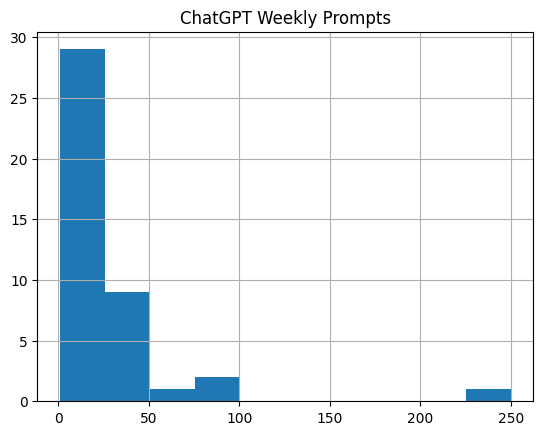

In [250]:
question_answer.hist("ChatGPT Weekly Prompts")

array([[<Axes: title={'center': 'Google Gemini Weekly Prompts'}>]],
      dtype=object)

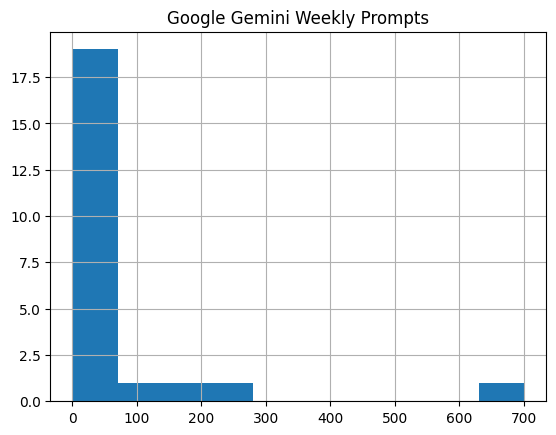

In [251]:
question_answer.hist("Google Gemini Weekly Prompts")

array([[<Axes: title={'center': 'Claude Weekly Prompts'}>]], dtype=object)

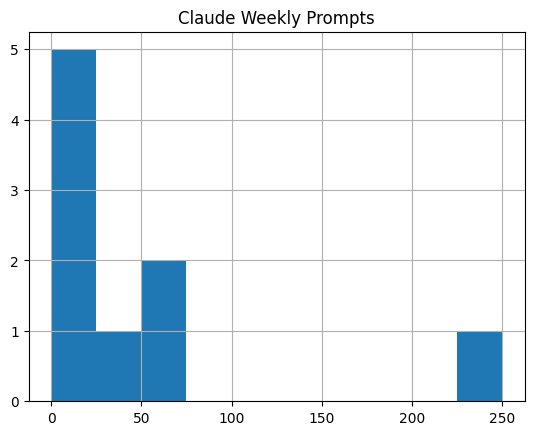

In [252]:
question_answer.hist("Claude Weekly Prompts")

In [272]:
costs = {"ChatGPT":{"electric":.34,"water":.519,"co2":.15},
         "Google Gemini":{"electric":.24,"water":.26,"co2":.03},
         "Claude":{"electric": 1,"water":.75,"co2":.2525}}

Estimating environmental costs from students using ChatGPT

In [278]:
models = {"ChatGPT":{"prompts":"ChatGPT Weekly Prompts","mean":"ChatGPT"},
          "Google Gemini":{"prompts": "Google Gemini Weekly Prompts","mean":"Google Gemini"},
          "Claude":{"prompts":"Claude Weekly Prompts","mean":"Claude (Anthropic)"}}

results = {}

N_students = 45087
weeks = 30
scale_constant = N_students * weeks

for model in models:
    prompt_col = models[model]["prompts"]
    use_col = models[model]["mean"]

    # Weekly prompts stats
    P = question_answer[prompt_col].dropna()
    P_bar = P.mean()
    Var_Pbar = P.var(ddof=1) / len(P)

    # Usage proportion stats (binary 0/1)
    U = question_answer[use_col].dropna()
    U_bar = U.mean()
    Var_Ubar = U_bar * (1 - U_bar) / len(U)

    # Total estimator
    T_hat = scale_constant * P_bar * U_bar

    # Delta method variance
    Var_T = (scale_constant**2) * (
        (U_bar**2) * Var_Pbar +
        (P_bar**2) * Var_Ubar
    )

    SE_T = np.sqrt(Var_T)

    lower_total = T_hat - 1.96 * SE_T
    upper_total = T_hat + 1.96 * SE_T

    # Apply environmental multipliers
    electric = costs[model]["electric"]
    water = costs[model]["water"]
    co2 = costs[model]["co2"]

    results[model] = {
        "CI_total_prompts": (lower_total, upper_total),
        "CI_electric_Wh": (lower_total * electric,
                           upper_total * electric),
        "CI_water_ml": (lower_total * water,
                        upper_total * water),
        "CI_co2_g": (lower_total * co2,
                     upper_total * co2)
    }
    
    
rows = []

for model in results:
    row = {
        "Model": model,
        "Electric_Lower_Wh": results[model]["CI_electric_Wh"][0],
        "Electric_Upper_Wh": results[model]["CI_electric_Wh"][1],
        "Water_Lower_ml": results[model]["CI_water_ml"][0],
        "Water_Upper_ml": results[model]["CI_water_ml"][1],
        "CO2_Lower_g": results[model]["CI_co2_g"][0],
        "CO2_Upper_g": results[model]["CI_co2_g"][1],
    }
    rows.append(row)

ci_df = pd.DataFrame(rows)

In [281]:
ci_df

,Model,Electric_Lower_Wh,Electric_Upper_Wh,Water_Lower_ml,Water_Upper_ml,CO2_Lower_g,CO2_Upper_g
0,ChatGPT,3.560955e+06,1.084885e+07,5.435694e+06,1.656045e+07,1.571010e+06,4.786257e+06
1,Google Gemini,6.860597e+04,1.246888e+07,7.432313e+04,1.350795e+07,8.575746e+03,1.558610e+06
2,Claude,-1.305949e+06,1.800081e+07,-9.794619e+05,1.350061e+07,-3.297522e+05,4.545206e+06


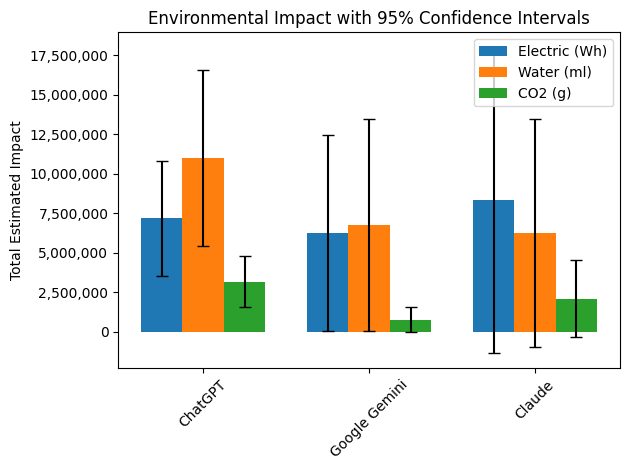

In [282]:
import matplotlib.ticker as ticker
models = ci_df["Model"]

# Midpoints and errors
electric_mean = (ci_df["Electric_Lower_Wh"] + ci_df["Electric_Upper_Wh"]) / 2
electric_err = (ci_df["Electric_Upper_Wh"] - ci_df["Electric_Lower_Wh"]) / 2

water_mean = (ci_df["Water_Lower_ml"] + ci_df["Water_Upper_ml"]) / 2
water_err = (ci_df["Water_Upper_ml"] - ci_df["Water_Lower_ml"]) / 2

co2_mean = (ci_df["CO2_Lower_g"] + ci_df["CO2_Upper_g"]) / 2
co2_err = (ci_df["CO2_Upper_g"] - ci_df["CO2_Lower_g"]) / 2

x = np.arange(len(models))
width = 0.25

plt.figure()

plt.bar(x - width, electric_mean, width, yerr=electric_err, capsize=4, label="Electric (Wh)")
plt.bar(x, water_mean, width, yerr=water_err, capsize=4, label="Water (ml)")
plt.bar(x + width, co2_mean, width, yerr=co2_err, capsize=4, label="CO2 (g)")

plt.xticks(x, models, rotation=45)
plt.ylabel("Total Estimated Impact")
plt.yscale("linear")
plt.gca().yaxis.set_major_formatter(
    ticker.StrMethodFormatter('{x:,.0f}')
)

plt.title("Environmental Impact with 95% Confidence Intervals")
plt.legend()

plt.tight_layout()
plt.show()